In [1]:
# !pip3 install matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 1.10.a What is μ for the three coins selected?

$$ 
P(heads) = P(tail) = 0.5 \text{ So } \mu = 0.5
\newline
\text{for each of } c_{1}, c_{min}  \text{and } c_{rand} \text{ this beacause it is a true probability of flipping heads}
$$


## 1.10.b Repeat the entire experiment a large number of times (e.g., 100,000 runs of the entire experiment) to get several instances of ν1, ν rand and ν min and plot the histograms of the distributions of ν1, ν rand and ν min. Notice that which coins end up being crand and cmin may differ from one run to another.

In [2]:
# experiment parameters
flips = 10
p = 0.5
coins = 1000
trials = 100000

# the experiment represent a binomial distribution so
outcome = np.random.binomial(flips, p, (trials, coins))
v1s = outcome[:, 0]
vMins = outcome.min(axis=1)     
vRands = np.apply_along_axis(np.random.choice, 1, outcome)

(array([6.2400e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.7599e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

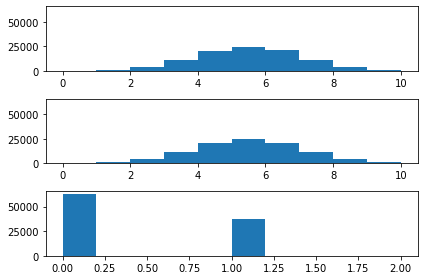

In [3]:
fig, axs = plt.subplots(3, sharey=True, tight_layout=True)
axs[0].hist(v1s, bins = 10)
axs[1].hist(vRands, bins = 10)
axs[2].hist(vMins, bins = 10)

# C1 end up being almost close to Crand which is logical but Cmin is not and Cmin will be different because it is calculated after all the flips in done

## Using (b), plot estimates of P[|𝜈 − 𝜇| > 𝜖] as a function of ε, together with the Hoeffding bound 2𝑒−2𝜖2𝑁 (on the same graph).

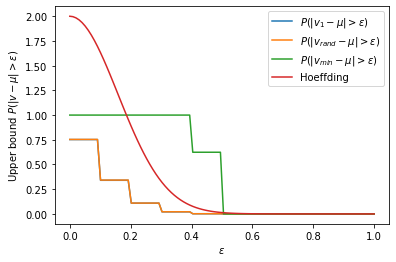

In [4]:
def pError(v, mu, epsilon):
    return (np.abs(v - mu)/flips > epsilon).mean()
def hoeffding(epsilon, N=flips):
    return 2 * np.exp(-2 * (epsilon**2) * N)
epsilons = np.linspace(0,10,100) / flips
c1Errs = [pError(v1s, 5, e) for e in epsilons]
cRandErrs = [pError(vRands, 5, e) for e in epsilons]
cMinErrs = [pError(vMins, 5, e) for e in epsilons]
plt.plot(epsilons, c1Errs, label='$ P(|v_{1} - \mu| > \epsilon) $')
plt.plot(epsilons, cRandErrs, label='$ P(|v_{rand} - \mu| > \epsilon) $')
plt.plot(epsilons, cMinErrs, label='$ P(|v_{min} - \mu| > \epsilon) $')
plt.plot(epsilons, np.apply_along_axis(hoeffding, 0, epsilons), label='Hoeffding')
plt.xlabel('$ \epsilon $')
plt.ylabel('Upper bound $ P(|v - \mu| > \epsilon)$')
plt.legend()



## 1.10.d Which coins obey the Hoeffding bound, which ones do not? Explain why.

## As showen in graph $ v_{1} $ and $ v_{rand} $ obay the hoeffding bound but $ v_{min} $ doesn't becasue that it is selected from the distrubution based on the result so it its computed after fliping all the coins

## 1.10.e Relate part (d) to the multiple bins in Figure 1.

## 1.4.a Generate a linearly separable data set of size 20 where d=2. Plot the examples {𝑥𝑛} as well as the target function f on a plane. Be sure to mark the examples from different classes y differently and add labels to the axes of the plot.

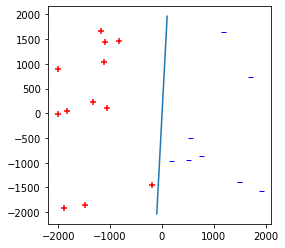

In [380]:
N = 20
d = 2

line_prams = np.random.randint(low=-100, high=100, size=(2))
figsize = plt.figaspect(1)
f, ax = plt.subplots(1, 1, figsize=figsize)
x = np.arange(-100, 100, 0.01)
y = -(line_prams[0]+line_prams[1]*x)
line = ax.plot(x, y, label='True Function')
low = np.min(y)
high = np.max(y)
points = np.random.randint(low=low, high=high, size=(N, 2))
pluses = []
minuses = []
for point in points:
    if point[1] + line_prams[1] * point[0] + line_prams[0] >= 0:
        pluses.append(point)
    else:
        minuses.append(point)
pluses = np.array(pluses)
minuses = np.array(minuses)
pluses = ax.scatter(pluses[:,0], pluses[:,1], marker='+', c= 'r', label='+1 labels')
minuses = ax.scatter(minuses[:,0], minuses[:,1], marker=r'$-$', c= 'b', label='-1 labels')
# plt.legend(['True Function', '+1 labels', '-1 labels', ], loc='center right')